<a href="https://colab.research.google.com/github/LatiefDataVisionary/data-science-application-college-task/blob/main/UAS_ADS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deskripsi Dataset**

Dataset Harga Rumah merupakan daftar harga rumah yang terbagi menjadi 2 data, yaitu data harga rumah daerah Jaksel dan data harga rumah daerah Tebet. Data diambil dan dikumpulkan dari beberapa website penjualan seperti rumah123.com

Dataset yang digunakan: HARGA RUMAH JAKSEL
Dataset harga rumah jaksel terdiri dari 7 kolom dengan jumlah data yaitu 1000 data. Kolom tersebut terdiri dari :

1. `HARGA` : harga dari rumah.
2. `LT` : jumlah luas tanah.
3. `LB` : jumlah luas bangunan.
4. `JKT` : jumlah kamar tidur.
5. `JKM` : jumlah kamar mandi.
6. `GRS` : garasi (ada/tidak ada)
7. `KOTA` : nama kota.

## **1. Persiapan Lingkungan dan Import Library**

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## **2. Memuat dan Eksplorasi Data (Exploratory Data Analysis - EDA)**

Untuk datasetnya sudah saya download dan saya simpan di Github saya dengan link datasetnya terdapat di variabel `path`.

In [91]:
path = 'https://github.com/LatiefDataVisionary/data-science-application-college-task/raw/refs/heads/main/datasets/HARGA%20RUMAH%20JAKSEL.xlsx'

# Melewati baris pertama dan menggunakan baris kedua sebagai nama kolom
df = pd.read_excel(path, skiprows=[0], header=0)
display(df.head())

,HARGA,LT,LB,JKT,JKM,GRS,KOTA
0,28000000000,1100,700,5,6,ADA,JAKSEL
1,19000000000,824,800,4,4,ADA,JAKSEL
2,4700000000,500,400,4,3,ADA,JAKSEL
3,4900000000,251,300,5,4,ADA,JAKSEL
4,28000000000,1340,575,4,5,ADA,JAKSEL


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   HARGA   1001 non-null   int64 
 1   LT      1001 non-null   int64 
 2   LB      1001 non-null   int64 
 3   JKT     1001 non-null   int64 
 4   JKM     1001 non-null   int64 
 5   GRS     1001 non-null   object
 6   KOTA    1001 non-null   object
dtypes: int64(5), object(2)
memory usage: 54.9+ KB


In [93]:
df.describe()

,HARGA,LT,LB,JKT,JKM
count,1.001000e+03,1001.000000,1001.000000,1001.000000,1001.000000
mean,1.747472e+10,530.504496,487.275724,4.457542,3.940060
std,2.079548e+10,531.069773,452.872262,2.004606,1.903261
min,4.300000e+08,22.000000,38.000000,1.000000,1.000000
25%,6.750000e+09,220.000000,300.000000,4.000000,3.000000
50%,1.350000e+10,400.000000,411.000000,4.000000,4.000000
75%,2.000000e+10,677.000000,600.000000,5.000000,4.000000
max,2.500000e+11,6790.000000,10000.000000,27.000000,27.000000


In [94]:
df.duplicated().sum()

np.int64(70)

#### 2.1 Menangani Nilai yang Hilang

In [95]:
# Cek jumlah nilai yang hilang per kolom
print("Jumlah nilai yang hilang per kolom:")
print(df.isnull().sum())

# Berdasarkan output df.info() sebelumnya, tidak ada nilai yang hilang.
# Jika di dataset lain ada nilai yang hilang, kode untuk menanganinya akan ditempatkan di sini.
# Contoh:
# df['NamaKolomNumerik'].fillna(df['NamaKolomNumerik'].mean(), inplace=True)
# df['NamaKolomKategorikal'].fillna(df['NamaKolomKategorikal'].mode()[0], inplace=True)

Jumlah nilai yang hilang per kolom:
HARGA    0
LT       0
LB       0
JKT      0
JKM      0
GRS      0
KOTA     0
dtype: int64


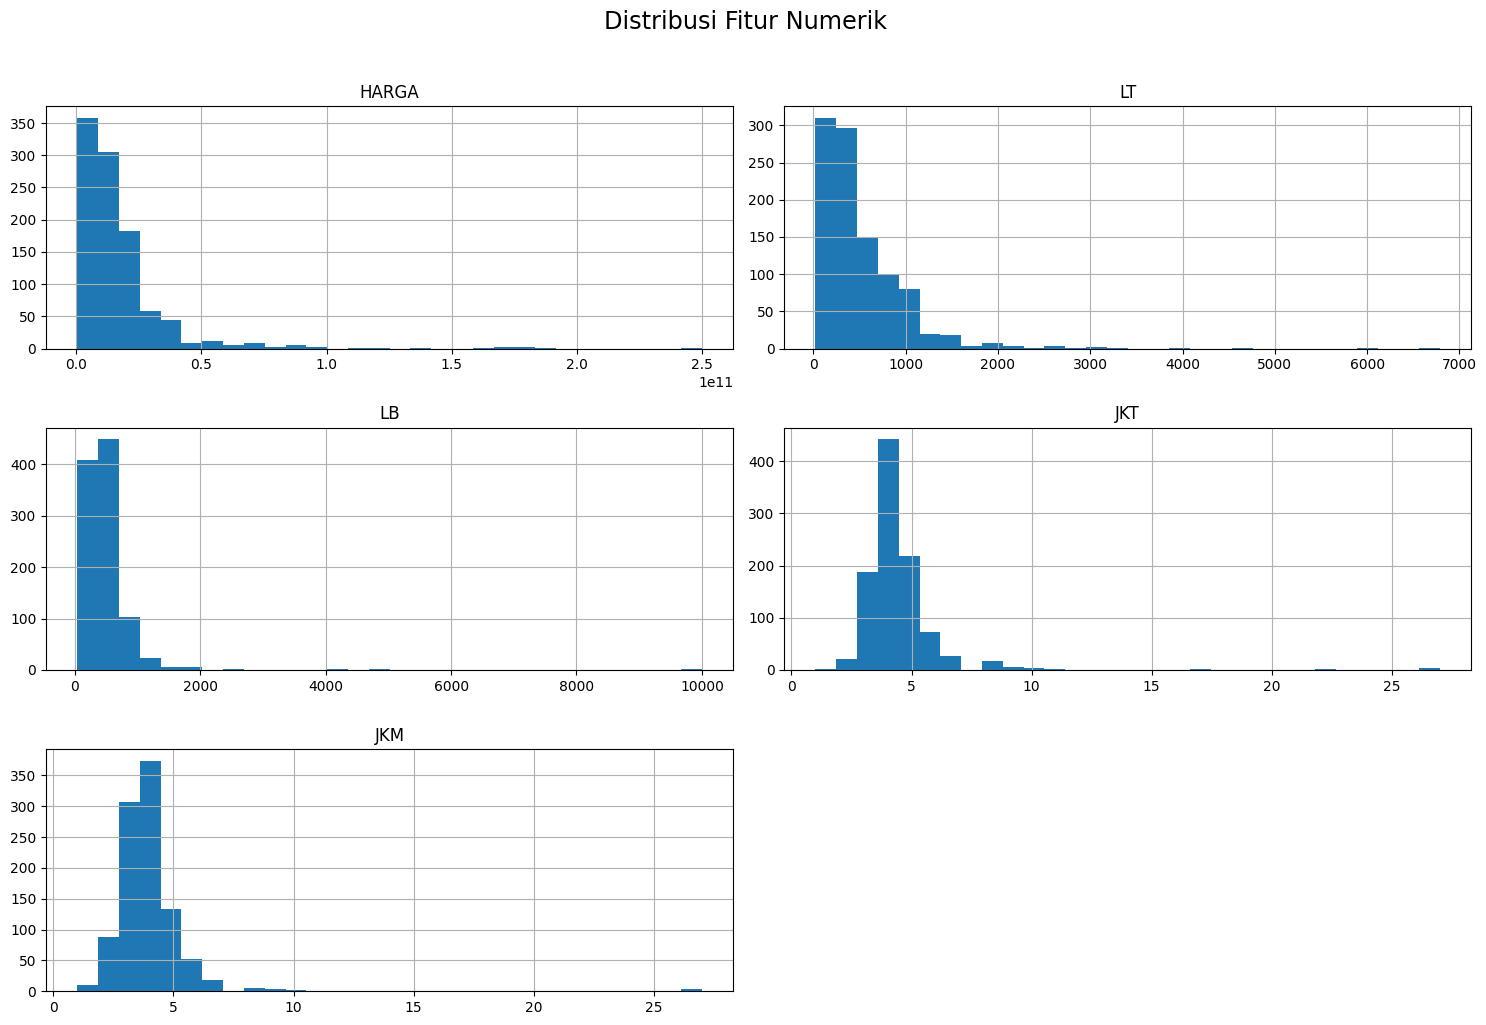

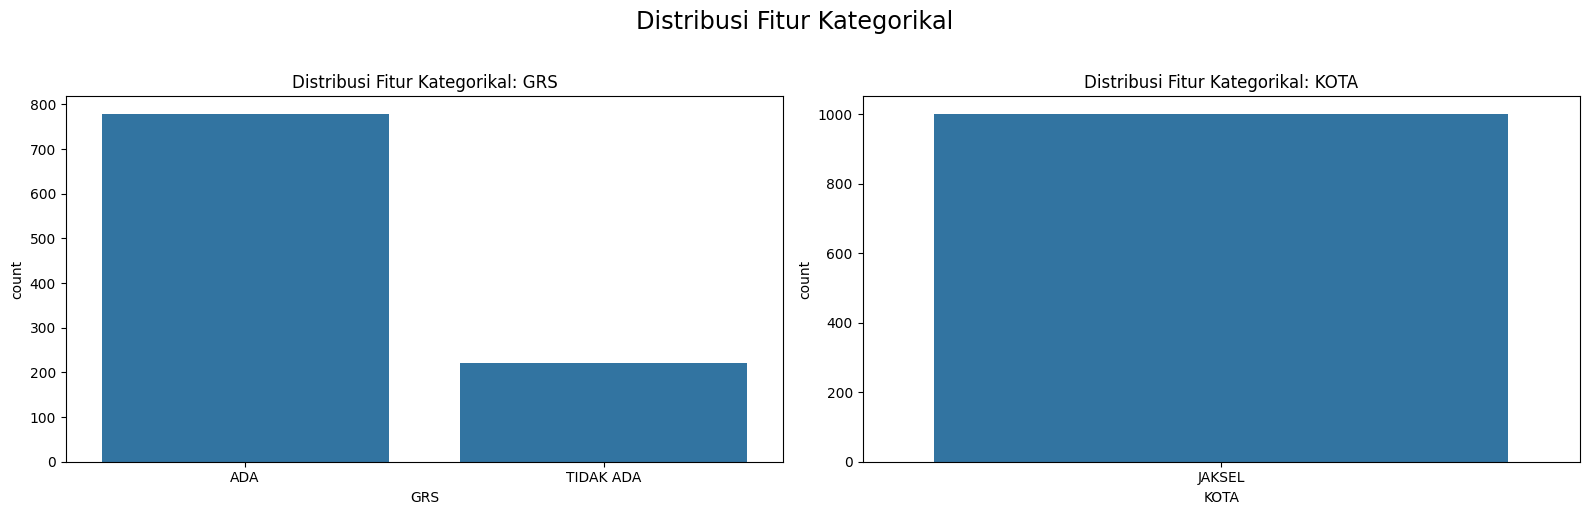

In [96]:
# Menganalisis distribusi fitur numerik (HARGA, LT, LB, JKT, JKM)
numerical_features = ['HARGA', 'LT', 'LB', 'JKT', 'JKM']
df[numerical_features].hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribusi Fitur Numerik', y=1.02, ha='center', fontsize='xx-large')
plt.tight_layout()
plt.show()

# Menganalisis distribusi fitur kategorikal (GRS, KOTA)
categorical_features = ['GRS', 'KOTA']

# Hitung jumlah baris dan kolom untuk subplot
n_cols = 2  # Jumlah kolom subplot yang diinginkan
n_rows = (len(categorical_features) + n_cols - 1) // n_cols # Hitung jumlah baris yang dibutuhkan

plt.figure(figsize=(8 * n_cols, 5 * n_rows))
plt.suptitle('Distribusi Fitur Kategorikal', y=1.02, ha='center', fontsize='xx-large')

for i, col in enumerate(categorical_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribusi Fitur Kategorikal: {col}')
    plt.tight_layout()

plt.show()

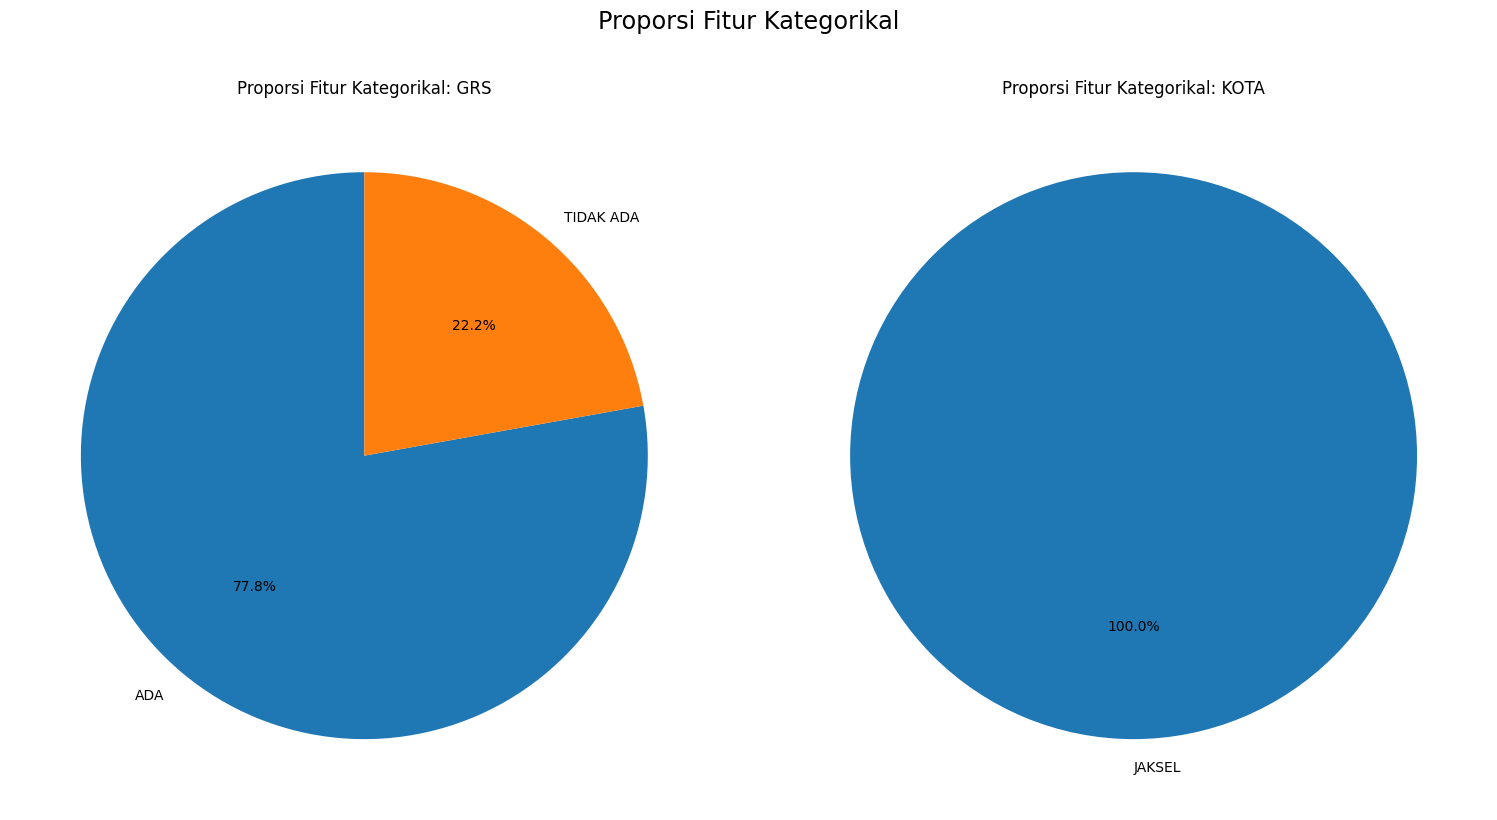

In [97]:
# Membuat pie plot untuk fitur kategorikal
categorical_features = ['GRS', 'KOTA']

# Hitung jumlah baris dan kolom untuk subplot
n_cols = 2  # Jumlah kolom subplot yang diinginkan
n_rows = (len(categorical_features) + n_cols - 1) // n_cols # Hitung jumlah baris yang dibutuhkan

plt.figure(figsize=(8 * n_cols, 8 * n_rows))
plt.suptitle('Proporsi Fitur Kategorikal', y=1.02, ha='center', fontsize='xx-large')

for i, col in enumerate(categorical_features):
    plt.subplot(n_rows, n_cols, i + 1)
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Proporsi Fitur Kategorikal: {col}')
    plt.ylabel('') # Menghilangkan label y default
    plt.tight_layout()

plt.show()

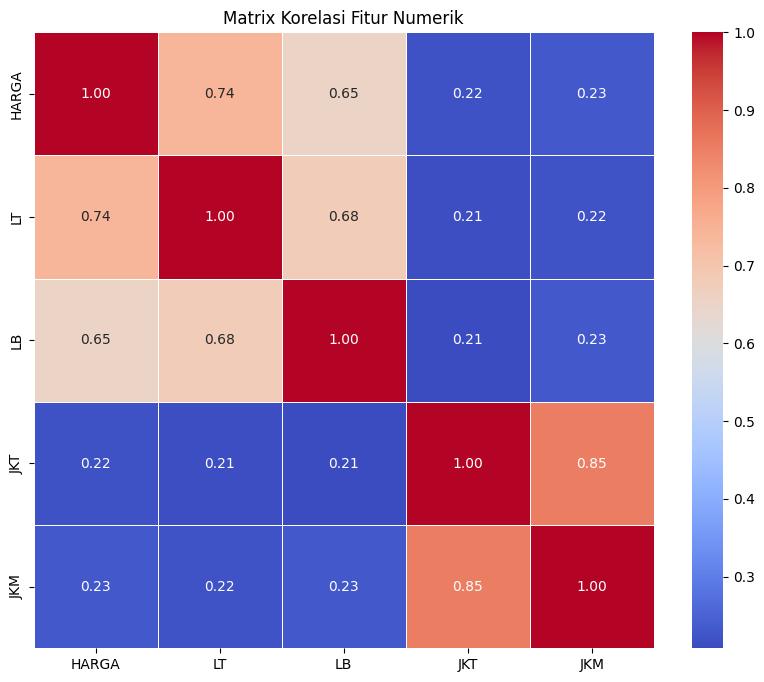

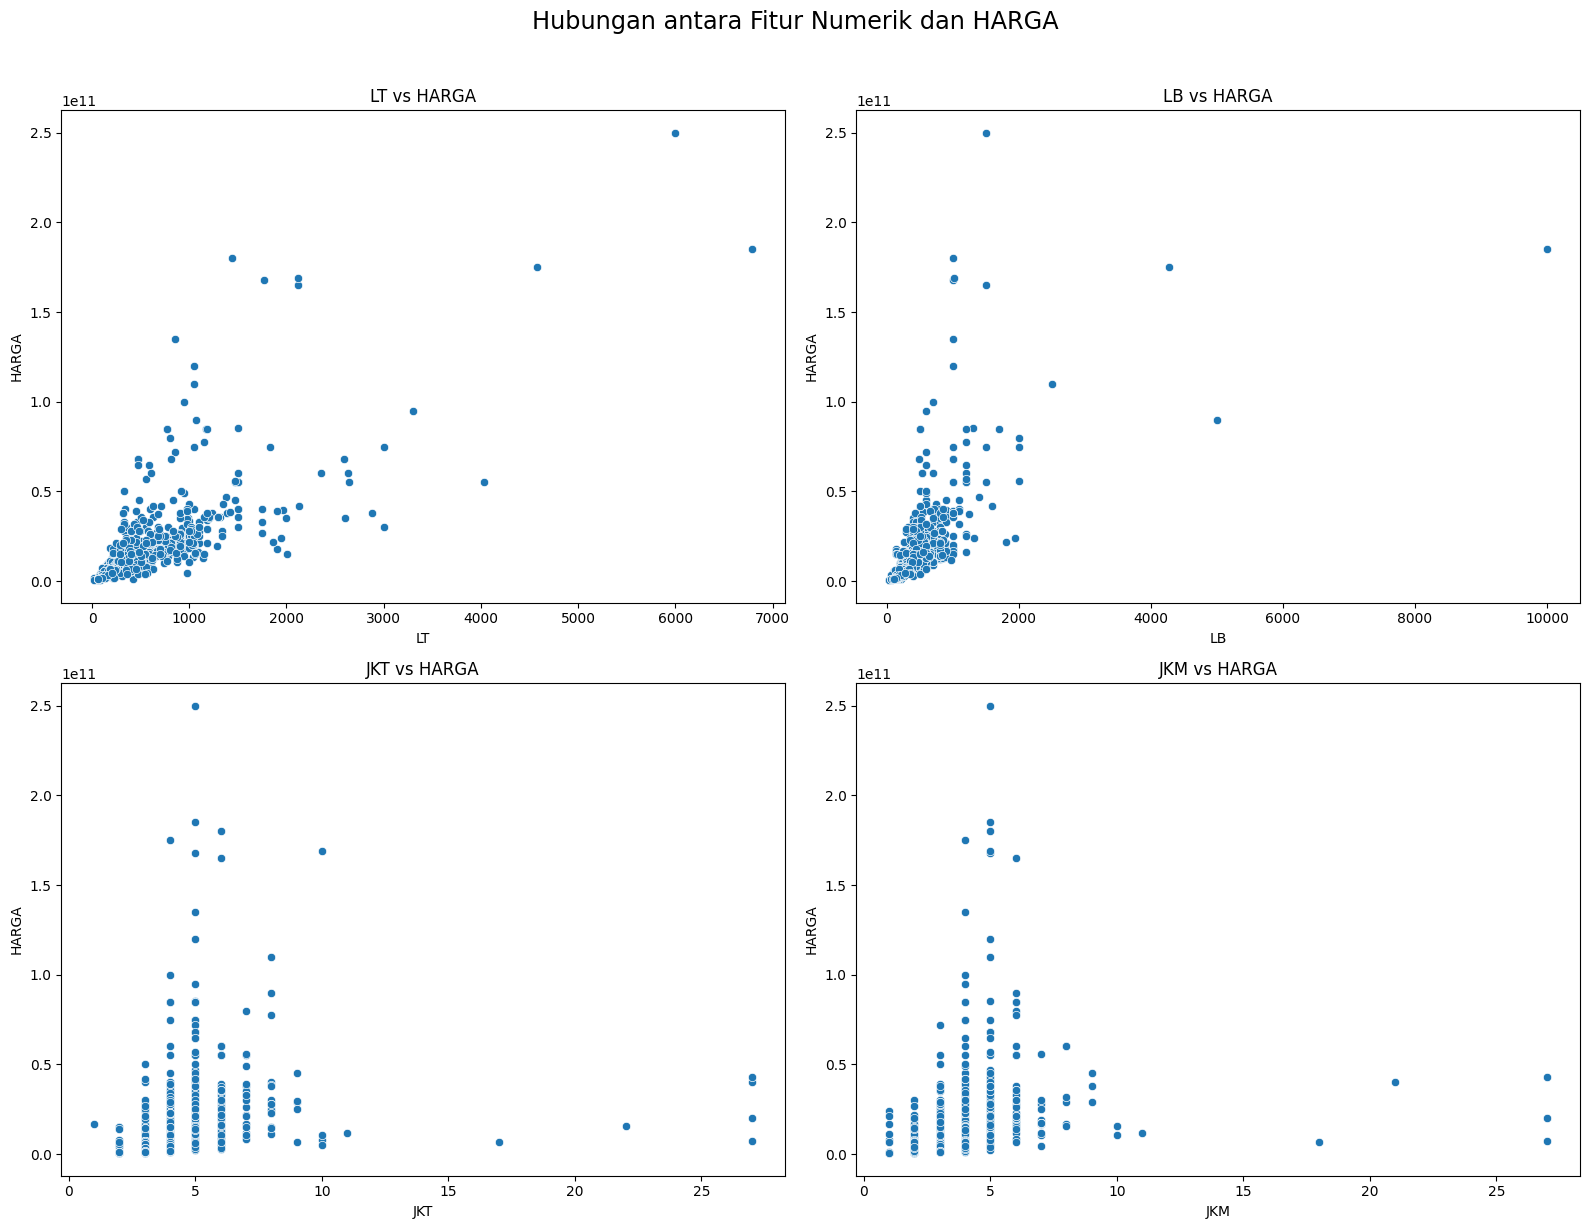

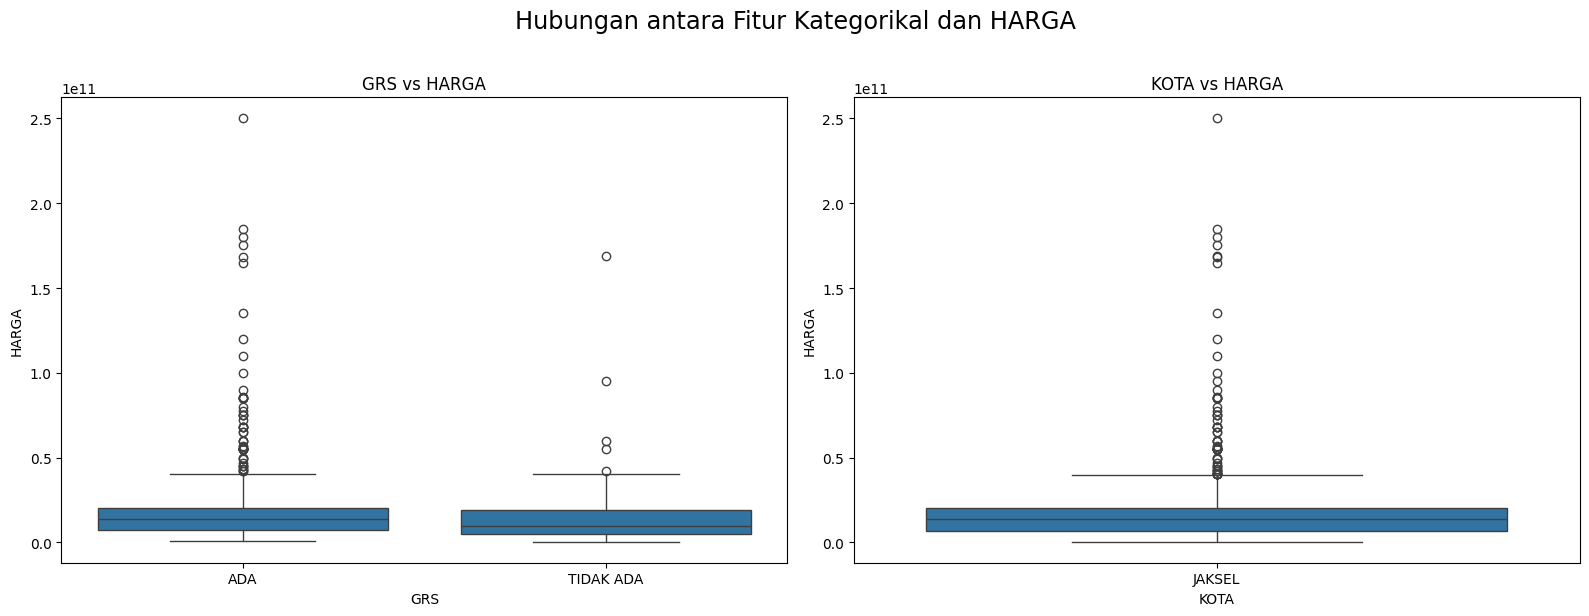

In [98]:
# Korelasi antar fitur numerik
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrix Korelasi Fitur Numerik')
plt.show()

# Scatter plot antara fitur numerik dengan HARGA
numerical_features_for_scatter = ['LT', 'LB', 'JKT', 'JKM']
n_cols_scatter = 2
n_rows_scatter = (len(numerical_features_for_scatter) + n_cols_scatter - 1) // n_cols_scatter

plt.figure(figsize=(8 * n_cols_scatter, 6 * n_rows_scatter))
plt.suptitle('Hubungan antara Fitur Numerik dan HARGA', y=1.02, ha='center', fontsize='xx-large')

for i, col in enumerate(numerical_features_for_scatter):
    plt.subplot(n_rows_scatter, n_cols_scatter, i + 1)
    sns.scatterplot(data=df, x=col, y='HARGA')
    plt.title(f'{col} vs HARGA')
    plt.tight_layout()

plt.show()


# Box plot atau violin plot untuk melihat hubungan fitur kategorikal dengan HARGA
categorical_features_for_box = ['GRS', 'KOTA']
n_cols_box = 2
n_rows_box = (len(categorical_features_for_box) + n_cols_box - 1) // n_cols_box

plt.figure(figsize=(8 * n_cols_box, 6 * n_rows_box))
plt.suptitle('Hubungan antara Fitur Kategorikal dan HARGA', y=1.02, ha='center', fontsize='xx-large')

for i, col in enumerate(categorical_features_for_box):
    plt.subplot(n_rows_box, n_cols_box, i + 1)
    sns.boxplot(data=df, x=col, y='HARGA')
    plt.title(f'{col} vs HARGA')
    plt.tight_layout()

plt.show()

## **3. Pra-pemrosesan Data**

In [99]:
# Identifikasi fitur kategorikal dan numerik
categorical_features = ['GRS', 'KOTA']
numerical_features = ['LT', 'LB', 'JKT', 'JKM'] # Exclude 'HARGA' as it's the target

# Buat pipeline untuk pra-pemrosesan
# One-hot encode fitur kategorikal
# Biarkan fitur numerik apa adanya untuk saat ini (scaling bisa ditambahkan jika diperlukan)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)],
    remainder='passthrough' # Biarkan kolom numerik apa adanya
)

# Terapkan pra-pemrosesan pada data
X = df.drop('HARGA', axis=1)
y = df['HARGA']

# Terapkan preprocessor pada fitur X
X_processed = preprocessor.fit_transform(X)

# Konversi hasil pra-pemrosesan kembali ke DataFrame untuk kemudahan melihat hasilnya (opsional)
# Ambil nama kolom setelah one-hot encoding
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = list(ohe_feature_names) + numerical_features

X_processed_df = pd.DataFrame(X_processed, columns=all_feature_names)

print("Bentuk data setelah pra-pemrosesan:", X_processed_df.shape)
display(X_processed_df.head())

Bentuk data setelah pra-pemrosesan: (1001, 7)


,GRS_ADA,GRS_TIDAK ADA,KOTA_JAKSEL,LT,LB,JKT,JKM
0,1.0,0.0,1.0,1100.0,700.0,5.0,6.0
1,1.0,0.0,1.0,824.0,800.0,4.0,4.0
2,1.0,0.0,1.0,500.0,400.0,4.0,3.0
3,1.0,0.0,1.0,251.0,300.0,5.0,4.0
4,1.0,0.0,1.0,1340.0,575.0,4.0,5.0


## **4. Pemisahan Fitur dan Target, Serta Data Latih & Uji**

In [100]:
# Pisahkan fitur (X) dan target (y)
# X sudah kita siapkan di langkah pra-pemrosesan sebagai X_processed atau X_processed_df
# y juga sudah kita siapkan

# Bagi data menjadi data latih dan data uji
# Kita gunakan 80% data untuk pelatihan dan 20% untuk pengujian
X_train, X_test, y_train, y_test = train_test_split(X_processed_df, y, test_size=0.2, random_state=42)

print("Bentuk data latih (X_train):", X_train.shape)
print("Bentuk data uji (X_test):", X_test.shape)
print("Bentuk target latih (y_train):", y_train.shape)
print("Bentuk target uji (y_test):", y_test.shape)

Bentuk data latih (X_train): (800, 7)
Bentuk data uji (X_test): (201, 7)
Bentuk target latih (y_train): (800,)
Bentuk target uji (y_test): (201,)


## **5. Pemodelan, Pelatihan, dan Evaluasi**

### **5.1. Model 1: Regresi Linear Sederhana**

Penjelasan: Model ini hanya menggunakan satu fitur yang paling berkorelasi dengan harga. Kita akan lihat korelasinya terlebih dahulu.

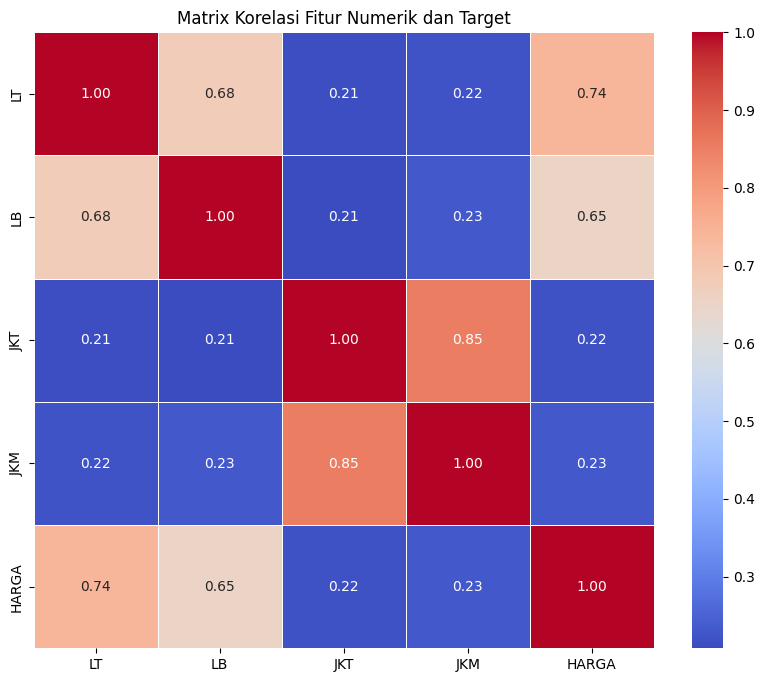

Fitur yang paling berkorelasi dengan HARGA adalah: LT
Nilai korelasi: 0.74

Bentuk data latih (X_train_simple): (800, 1)
Bentuk data uji (X_test_simple): (201, 1)


In [101]:
# [BLOK KODE 5: Korelasi & Heatmap, Pemilihan 1 Fitur]

# Hitung matriks korelasi untuk fitur numerik dan target
# Kita sudah menghitung ini sebelumnya, tapi mari kita lihat lagi untuk memudahkan pemilihan fitur
correlation_matrix = df[numerical_features + ['HARGA']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrix Korelasi Fitur Numerik dan Target')
plt.show()

# Identifikasi fitur dengan korelasi absolut tertinggi dengan HARGA (selain HARGA itu sendiri)
correlation_with_harga = correlation_matrix['HARGA'].sort_values(ascending=False)
most_correlated_feature = correlation_with_harga.drop('HARGA').index[0]

print(f"Fitur yang paling berkorelasi dengan HARGA adalah: {most_correlated_feature}")
print(f"Nilai korelasi: {correlation_with_harga[most_correlated_feature]:.2f}")

# Untuk regresi linear sederhana, kita hanya akan menggunakan fitur yang paling berkorelasi ini.
# Kita perlu memastikan fitur ini ada di X_train_processed dan X_test_processed
# Kita akan ekstrak kolom ini untuk model sederhana
X_train_simple = X_train[[most_correlated_feature]]
X_test_simple = X_test[[most_correlated_feature]]

print("\nBentuk data latih (X_train_simple):", X_train_simple.shape)
print("Bentuk data uji (X_test_simple):", X_test_simple.shape)

=== Evaluasi Model Regresi Linear Sederhana ===
Mean Squared Error (MSE): 106478757813238661120.00
R-squared (R2): 0.29


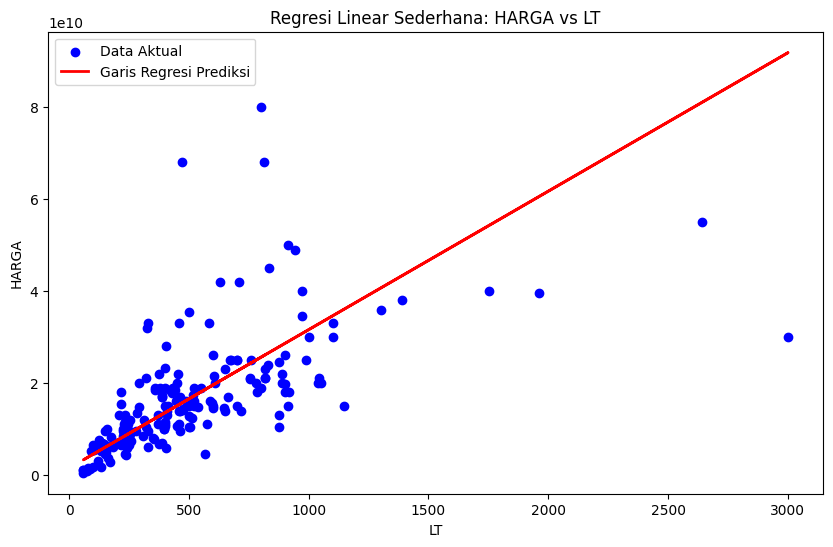

In [102]:
# Inisialisasi dan latih model Regresi Linear Sederhana
simple_lr_model = LinearRegression()
simple_lr_model.fit(X_train_simple, y_train)

# Lakukan prediksi pada data uji
y_pred_simple_lr = simple_lr_model.predict(X_test_simple)

# Evaluasi model
mse_simple_lr = mean_squared_error(y_test, y_pred_simple_lr)
r2_simple_lr = r2_score(y_test, y_pred_simple_lr)

print("=== Evaluasi Model Regresi Linear Sederhana ===")
print(f"Mean Squared Error (MSE): {mse_simple_lr:.2f}")
print(f"R-squared (R2): {r2_simple_lr:.2f}")

# Visualisasi hasil (opsional)
plt.figure(figsize=(10, 6))
plt.scatter(X_test_simple, y_test, color='blue', label='Data Aktual')
plt.plot(X_test_simple, y_pred_simple_lr, color='red', linewidth=2, label='Garis Regresi Prediksi')
plt.xlabel(most_correlated_feature)
plt.ylabel('HARGA')
plt.title(f'Regresi Linear Sederhana: HARGA vs {most_correlated_feature}')
plt.legend()
plt.show()

### **5.2. Model 2: Regresi Linear Berganda**

Penjelasan: Model ini menggunakan semua fitur yang tersedia untuk melakukan prediksi.

In [103]:
# Inisialisasi dan latih model Regresi Linear Berganda menggunakan semua fitur
multiple_lr_model = LinearRegression()
multiple_lr_model.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred_multiple_lr = multiple_lr_model.predict(X_test)

# Evaluasi model
mse_multiple_lr = mean_squared_error(y_test, y_pred_multiple_lr)
r2_multiple_lr = r2_score(y_test, y_pred_multiple_lr)

print("=== Evaluasi Model Regresi Linear Berganda ===")
print(f"Mean Squared Error (MSE): {mse_multiple_lr:.2f}")
print(f"R-squared (R2): {r2_multiple_lr:.2f}")

# Koefisien model dalam format tabel
print("\nKoefisien model:")
coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': multiple_lr_model.coef_})
display(coef_df)
print(f"\nIntercept: {multiple_lr_model.intercept_:.2f}")

=== Evaluasi Model Regresi Linear Berganda ===
Mean Squared Error (MSE): 76695956418890301440.00
R-squared (R2): 0.49

Koefisien model:


,Feature,Coefficient
0,GRS_ADA,9.669738e+08
1,GRS_TIDAK ADA,-9.669738e+08
2,KOTA_JAKSEL,4.597008e-06
3,LT,2.311563e+07
4,LB,1.050420e+07
5,JKT,1.986017e+08
6,JKM,3.334533e+08



Intercept: -2652470031.27


### **5.3. Model 3: Decision Tree Regressor**

Penjelasan: Melatih dan mengevaluasi model menggunakan algoritma Decision Tree.

In [104]:
# Inisialisasi dan latih model Decision Tree Regressor
decision_tree_model = DecisionTreeRegressor(random_state=42) # Menggunakan random_state untuk reproduktifitas
decision_tree_model.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Evaluasi model
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)

print("=== Evaluasi Model Decision Tree Regressor ===")
print(f"Mean Squared Error (MSE): {mse_decision_tree:.2f}")
print(f"R-squared (R2): {r2_decision_tree:.2f}")

# Visualisasi fitur penting (opsional)
print("\nFitur Penting (Feature Importances):")
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': decision_tree_model.feature_importances_})
display(feature_importances_df.sort_values(by='Importance', ascending=False))

=== Evaluasi Model Decision Tree Regressor ===
Mean Squared Error (MSE): 118269389331122159616.00
R-squared (R2): 0.21

Fitur Penting (Feature Importances):


,Feature,Importance
4,LB,0.478672
3,LT,0.419524
6,JKM,0.046333
5,JKT,0.045709
0,GRS_ADA,0.008622
1,GRS_TIDAK ADA,0.001140
2,KOTA_JAKSEL,0.000000


#### 5.4. Model 4: Random Forest Regressor

Penjelasan: Melatih dan mengevaluasi model menggunakan algoritma Random Forest.

In [105]:
# Inisialisasi dan latih model Random Forest Regressor
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42) # n_estimators bisa disesuaikan
random_forest_model.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred_random_forest = random_forest_model.predict(X_test)

# Evaluasi model
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
r2_random_forest = r2_score(y_test, y_pred_random_forest)

print("=== Evaluasi Model Random Forest Regressor ===")
print(f"Mean Squared Error (MSE): {mse_random_forest:.2f}")
print(f"R-squared (R2): {r2_random_forest:.2f}")

# Visualisasi fitur penting (opsional)
print("\nFitur Penting (Feature Importances):")
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': random_forest_model.feature_importances_})
display(feature_importances_df.sort_values(by='Importance', ascending=False))

=== Evaluasi Model Random Forest Regressor ===
Mean Squared Error (MSE): 65625724175544770560.00
R-squared (R2): 0.56

Fitur Penting (Feature Importances):


,Feature,Importance
3,LT,0.462177
4,LB,0.454989
5,JKT,0.039531
6,JKM,0.032909
1,GRS_TIDAK ADA,0.005637
0,GRS_ADA,0.004757
2,KOTA_JAKSEL,0.000000


## **6. Ringkasan Hasil Evaluasi Model**

Setelah melatih dan mengevaluasi keempat model, mari kita bandingkan performanya berdasarkan metrik Mean Squared Error (MSE) dan R-squared.

In [106]:
# Buat dictionary untuk menyimpan hasil evaluasi
eval_results = {
    'Model': ['Regresi Linear Sederhana', 'Regresi Linear Berganda', 'Decision Tree Regressor', 'Random Forest Regressor'],
    'MSE': [mse_simple_lr, mse_multiple_lr, mse_decision_tree, mse_random_forest],
    'R2 Score': [r2_simple_lr, r2_multiple_lr, r2_decision_tree, r2_random_forest]
}

# Buat DataFrame dari dictionary
eval_df = pd.DataFrame(eval_results)

# Urutkan berdasarkan R2 Score (semakin tinggi semakin baik)
eval_df_sorted_r2 = eval_df.sort_values(by='R2 Score', ascending=False)

print("=== Ringkasan Hasil Evaluasi Model ===")
display(eval_df_sorted_r2)

# Komentar singkat mengenai model terbaik berdasarkan R2 Score
best_model_name = eval_df_sorted_r2.iloc[0]['Model']
best_r2_score = eval_df_sorted_r2.iloc[0]['R2 Score']

print(f"\nBerdasarkan nilai R-squared, model terbaik adalah: {best_model_name} dengan R-squared = {best_r2_score:.2f}")

=== Ringkasan Hasil Evaluasi Model ===


,Model,MSE,R2 Score
3,Random Forest Regressor,6.562572e+19,0.559380
1,Regresi Linear Berganda,7.669596e+19,0.485053
0,Regresi Linear Sederhana,1.064788e+20,0.285088
2,Decision Tree Regressor,1.182694e+20,0.205924



Berdasarkan nilai R-squared, model terbaik adalah: Random Forest Regressor dengan R-squared = 0.56
